In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('hotel_bookings (1).csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [39]:
df.shape

(119390, 32)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

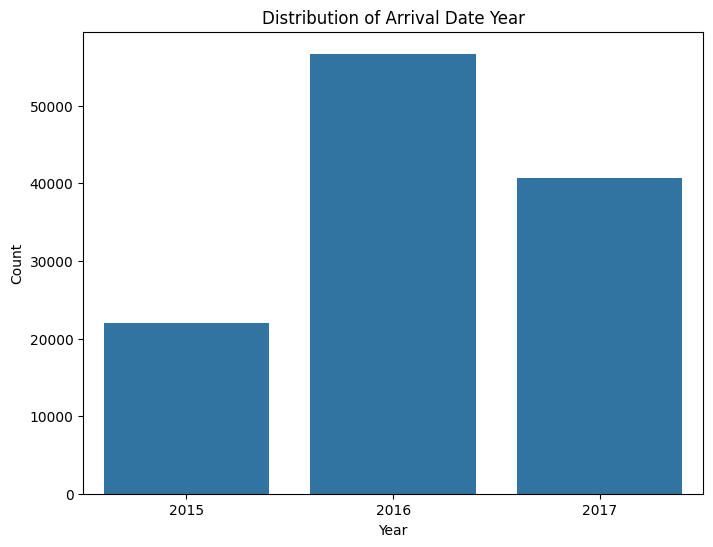

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='arrival_date_year')
plt.title('Distribution of Arrival Date Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

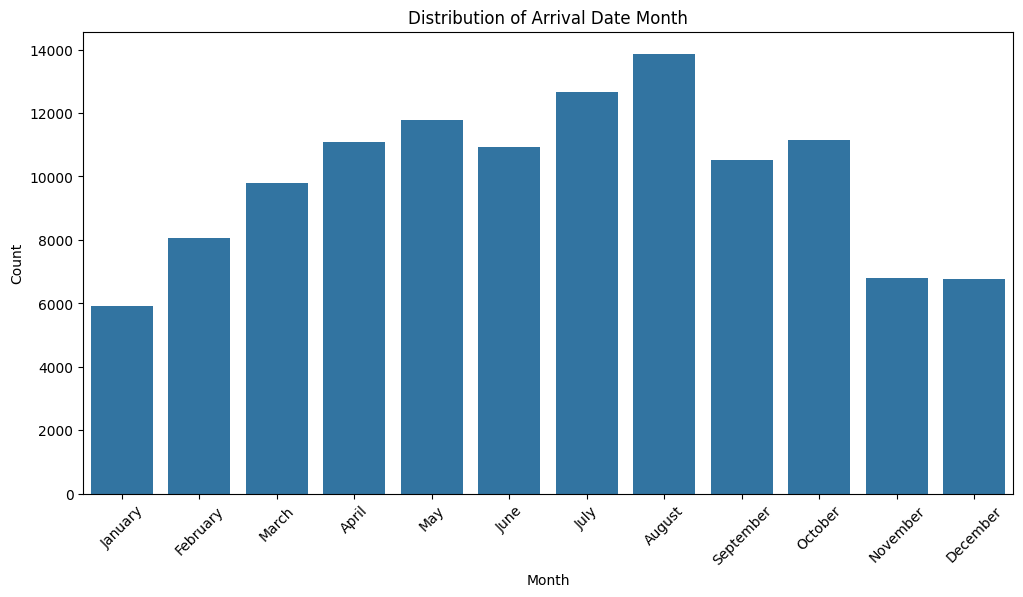

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Distribution of Arrival Date Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

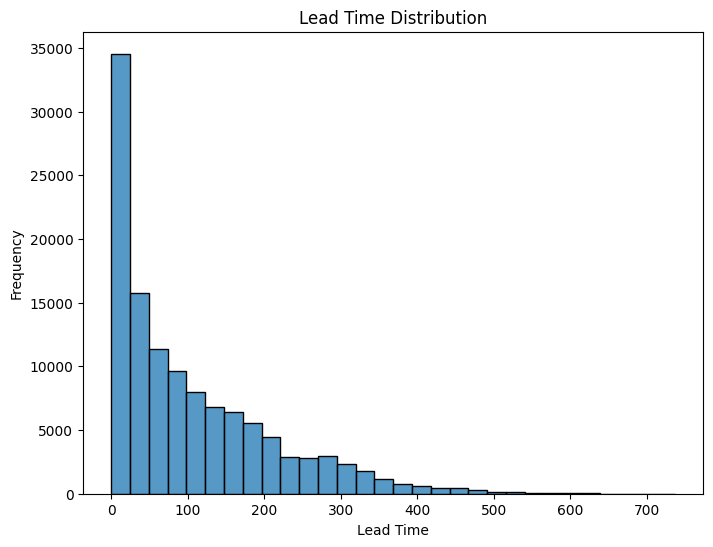

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='lead_time', bins=30)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

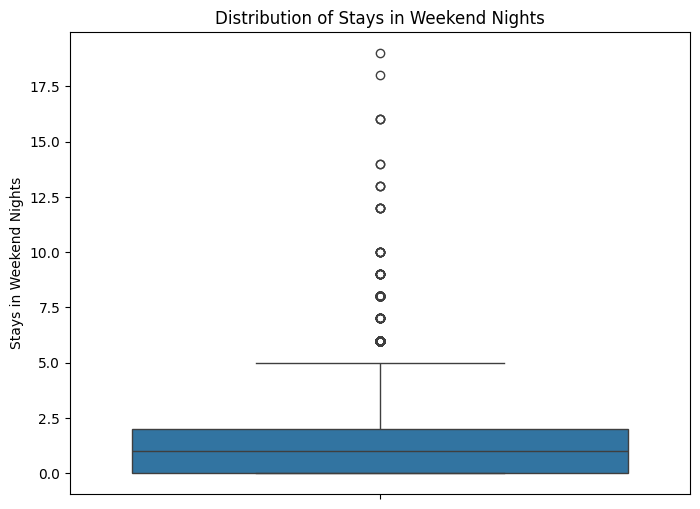

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='stays_in_weekend_nights')
plt.title('Distribution of Stays in Weekend Nights')
plt.ylabel('Stays in Weekend Nights')
plt.show()

<ipython-input-23-e8693a99cd3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


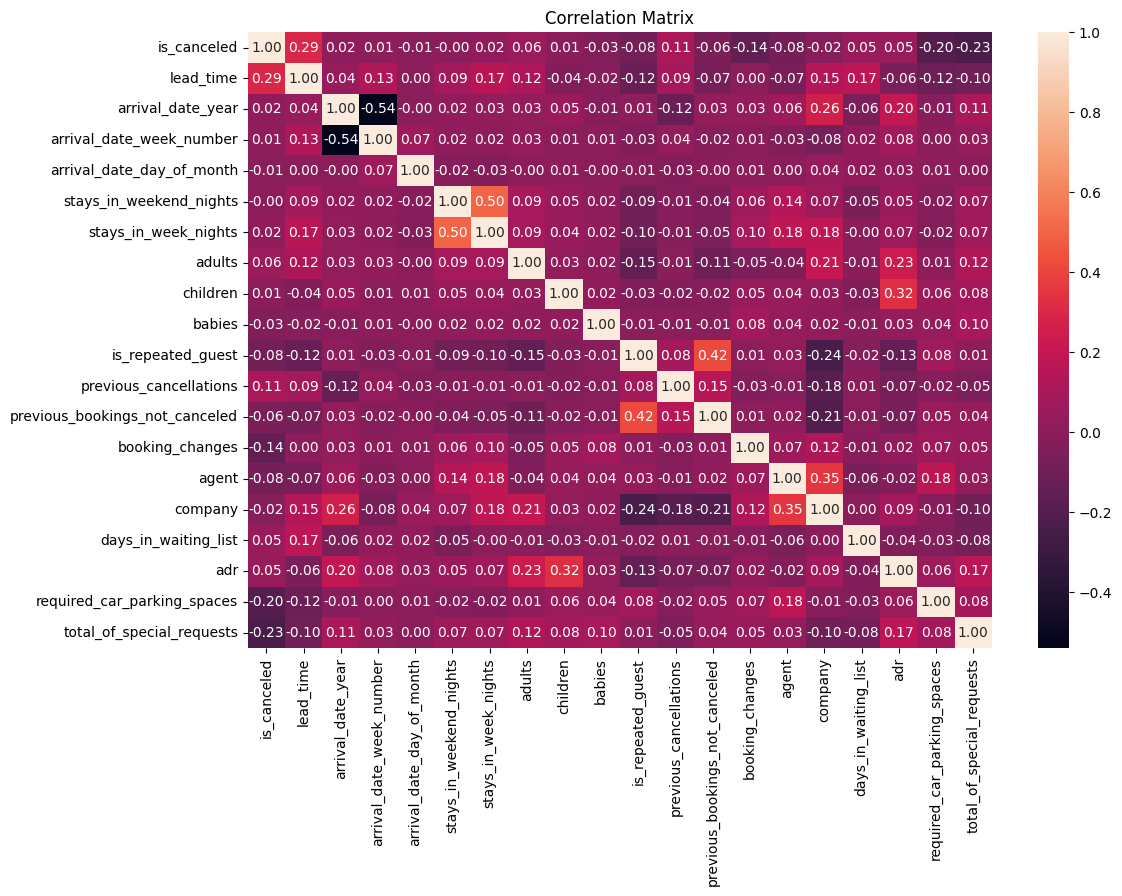

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [44]:
df.duplicated().sum()

31994

In [47]:
df.drop_duplicates( inplace = True)

In [48]:
df.shape

(87396, 32)

In [37]:
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [52]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
categorical_features = ['arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                        'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
numerical_features = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                      'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                      'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                      'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
                      'required_car_parking_spaces', 'total_of_special_requests']

In [55]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [57]:
X_train_processed = np.concatenate([X_train_encoded, X_train[numerical_features]], axis=1)
X_test_processed = np.concatenate([X_test_encoded, X_test[numerical_features]], axis=1)

In [63]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                15616     
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19841 (77.50 KB)
Trainable params: 19841 (77.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
history = model.fit(X_train_processed, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
874/874 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.7254 - val_loss: nan - val_accuracy: 0.7245
Epoch 2/10
874/874 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.7254 - val_loss: nan - val_accuracy: 0.7245
Epoch 3/10
874/874 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.7254 - val_loss: nan - val_accuracy: 0.7245
Epoch 4/10
874/874 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.7254 - val_loss: nan - val_accuracy: 0.7245
Epoch 5/10
874/874 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.7254 - val_loss: nan - val_accuracy: 0.7245
Epoch 6/10
874/874 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.7254 - val_loss: nan - val_accuracy: 0.7245
Epoch 7/10
874/874 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.7254 - val_loss: nan - val_accuracy: 0.7245
Epoch 8/10
874/874 [============================

In [67]:
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test)
print("Test Accuracy:", test_accuracy)

547/547 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7247
Test Accuracy: 0.7247139811515808
